# Diabete Prediction

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. And to predict our data we use logistic regression using sklearn

To take our data we use pandas and take useful features to use for our prediction

In [139]:
import pandas as pd 

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset

pima = pd.read_csv("diabetes.csv",  names=col_names)
pima.drop(pima.index[:1], inplace=True)

pima[col_names] = pima[col_names].apply(pd.to_numeric, errors='coerce')

After we take all useful features and put to X value, and label that define disease to y value

In [140]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label

# Split the data to train and test

Using sklearn I split our data to test and train, 25% data to test, rest of this to train

In [141]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Logistic Regression

We create the logistic regression model and fit our training data. After we put our prediction to y_pred value

In [142]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\baur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Confusion matrix

To see how accurate our prediction, we use confustion matrix, to see how many right prediction we have. How many we put the wrong disease, and vice vera.

In [143]:
from sklearn import metrics
cm1 = metrics.confusion_matrix(y_test, y_pred)
cm1

array([[117,  13],
       [ 24,  38]], dtype=int64)

With defining confusion metrics, we can identify sensitivity and speificity our data to see how much we put the right decision. 

In [144]:
sensitivity = cm1[1,1]/(cm1[1,1]+cm1[1,0])
print('Sensitivity : ', sensitivity1 )

specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.6129032258064516
Specificity :  0.9


## Representing confusion matrix in the picture

We also can represent our confusion matrix in the plot to understand more our model

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Actual label')

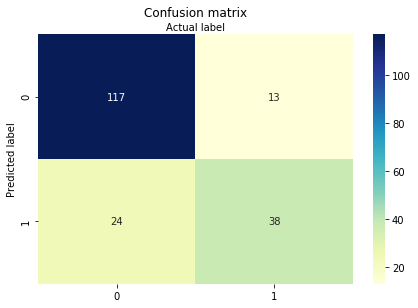

In [146]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

# Metrics

After we can calculate metrics of our prediction, and see accuracy, precision and recall of our data. Accuracy identify how accurate our prediction, precision identify how accurate prediction work in the defining diabetes without negative value. 

In [147]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


# ROC model

To see how much useful our prediction we use ROC model. In this graphic, we can see that we AUC 0.86, that show that AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

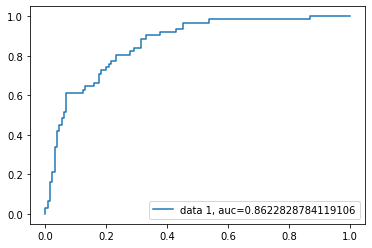

In [148]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()